In [ ]:
#pip install riotwatcher

In [1]:
import requests
import json
from riotwatcher import LolWatcher, ApiError
import pandas as pd
import pprint
import time

In [2]:
api_key = 'RGAPI-1b52e5bb-36b3-40d1-81cf-454e4b70c1f9'
watcher = LolWatcher(api_key)
my_region = 'na1'

me = watcher.summoner.by_name(my_region, 'Razei')
print(me)

{'id': 'Npy4mGZooPFGzFpT3TOKEn0r-1c8PRZjbG6uy0B27kRrkfY', 'accountId': 'iF2vqbXE6wAhQyGIbfitdOtCVo7dEzYuYlIff5p_YRQKHQ', 'puuid': 'avrRl5FAtE5p-_UfX3uQOSNZSabB5hrx8z35DRfLVNxHnIopbxfqHRyazUBZOQ4lp5VrS8HEYikyhQ', 'name': 'Razei', 'profileIconId': 508, 'revisionDate': 1649737857000, 'summonerLevel': 299}


In [3]:
my_ranked_stats = watcher.league.by_summoner(my_region, me['id'])
pprint.pprint(my_ranked_stats)

[{'freshBlood': False,
  'hotStreak': False,
  'inactive': False,
  'leagueId': 'eacbcca2-2861-402b-b738-f684da32edbf',
  'leaguePoints': 59,
  'losses': 84,
  'queueType': 'RANKED_FLEX_SR',
  'rank': 'II',
  'summonerId': 'Npy4mGZooPFGzFpT3TOKEn0r-1c8PRZjbG6uy0B27kRrkfY',
  'summonerName': 'Razei',
  'tier': 'PLATINUM',
  'veteran': False,
  'wins': 84}]


In [4]:
total_games_plays = my_ranked_stats[0]['wins'] + my_ranked_stats[0]['losses']

my_matches = []

my_matches.extend(watcher.match.matchlist_by_puuid('americas', me['puuid'], 0, 100))
pprint.pprint(my_matches)

['NA1_4274741261',
 'NA1_4273788652',
 'NA1_4273786835',
 'NA1_4273766169',
 'NA1_4273774320',
 'NA1_4273574891',
 'NA1_4273557837',
 'NA1_4272221857',
 'NA1_4272169231',
 'NA1_4269737723',
 'NA1_4269704272',
 'NA1_4263463176',
 'NA1_4263461087',
 'NA1_4263428185',
 'NA1_4263415065',
 'NA1_4261438986',
 'NA1_4261407831',
 'NA1_4261450115',
 'NA1_4259722476',
 'NA1_4260677732',
 'NA1_4260644937',
 'NA1_4260659846',
 'NA1_4259615084',
 'NA1_4259594245',
 'NA1_4258666602',
 'NA1_4258671478',
 'NA1_4258634763',
 'NA1_4258640045',
 'NA1_4258560537',
 'NA1_4258513241',
 'NA1_4257634684',
 'NA1_4257527563',
 'NA1_4257541308',
 'NA1_4257454685',
 'NA1_4257337401',
 'NA1_4256737554',
 'NA1_4256755204',
 'NA1_4256762578',
 'NA1_4256712868',
 'NA1_4256658929',
 'NA1_4256665051',
 'NA1_4255877735',
 'NA1_4255903877',
 'NA1_4255872313',
 'NA1_4255838646',
 'NA1_4255814994',
 'NA1_4255788988',
 'NA1_4255091655',
 'NA1_4255058818',
 'NA1_4255056516',
 'NA1_4255024354',
 'NA1_4255017912',
 'NA1_425226

In [5]:
#my_matches = watcher.match.matchlist_by_puuid('americas', me['puuid'])
table = []
for my_match in my_matches:
    match_detail = watcher.match.by_id('americas', my_match)

    info = {}
    team_total_damages_to_champs = 0
    for participant in match_detail["info"]["participants"]:
        if participant["summonerName"] == me['name']:
            info["ChampionName"] = participant['championName']
            info["ChampionLevel"] = participant['champLevel']
            info["Lane"] = participant['lane']
            info["Kills"] = participant['kills']
            info["Deaths"] = participant['deaths']
            info["Assists"] = participant['assists']
            info["Gold_Earned"] = participant['goldEarned']
            info["Total_Minions_Killed"] = participant['totalMinionsKilled']
            info["Total_damages_to_champs"] = participant['totalDamageDealtToChampions']
            info["Win/Lose"] = participant['win']
            info["TeamBaronKills"] = participant['challenges']['teamBaronKills']
            info["FirstBloodAssist"] = participant['firstBloodAssist']
            info["FirstBloodKill"] = participant['firstBloodKill']
            info["FirstTowerAssist"] = participant['firstTowerAssist']
            info["FirstTowerKill"] = participant['firstTowerKill']
            info["InhibitorKills"] = participant['inhibitorKills']
            info["InhibitorTakedowns"] = participant['inhibitorTakedowns']
            info["InhibitorsLost"] = participant['inhibitorsLost']
            info["TurretPlatesTaken"] = participant['challenges']['turretPlatesTaken']



    for participant in match_detail["info"]["participants"]:
        if participant['win'] == info["Win/Lose"]:
            team_total_damages_to_champs += participant['totalDamageDealtToChampions']

    info["TotalDamageDealtToChampions_Percentage"] = round(info["Total_damages_to_champs"] / team_total_damages_to_champs * 100, 2)

    table.append(info)
    time.sleep(0.1)

pprint.pprint(table)


[{'Assists': 26,
  'ChampionLevel': 18,
  'ChampionName': 'Akali',
  'Deaths': 14,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 20214,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 1,
  'InhibitorsLost': 1,
  'Kills': 24,
  'Lane': 'BOTTOM',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 28.86,
  'Total_Minions_Killed': 35,
  'Total_damages_to_champs': 49473,
  'TurretPlatesTaken': 0,
  'Win/Lose': True},
 {'Assists': 7,
  'ChampionLevel': 15,
  'ChampionName': 'Draven',
  'Deaths': 11,
  'FirstBloodAssist': True,
  'FirstBloodKill': False,
  'FirstTowerAssist': True,
  'FirstTowerKill': False,
  'Gold_Earned': 18115,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 0,
  'InhibitorsLost': 3,
  'Kills': 16,
  'Lane': 'MIDDLE',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 38.05,
  'Total_Minions_Killed': 207,
  'Total_damages_to_champs': 25894,
  'TurretPlatesTaken

  'TotalDamageDealtToChampions_Percentage': 27.44,
  'Total_Minions_Killed': 61,
  'Total_damages_to_champs': 28973,
  'TurretPlatesTaken': 0,
  'Win/Lose': False},
 {'Assists': 16,
  'ChampionLevel': 18,
  'ChampionName': 'Zed',
  'Deaths': 11,
  'FirstBloodAssist': False,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 16415,
  'InhibitorKills': 0,
  'InhibitorTakedowns': 1,
  'InhibitorsLost': 1,
  'Kills': 15,
  'Lane': 'TOP',
  'TeamBaronKills': 0,
  'TotalDamageDealtToChampions_Percentage': 23.82,
  'Total_Minions_Killed': 68,
  'Total_damages_to_champs': 32068,
  'TurretPlatesTaken': 0,
  'Win/Lose': False},
 {'Assists': 32,
  'ChampionLevel': 18,
  'ChampionName': 'Qiyana',
  'Deaths': 10,
  'FirstBloodAssist': True,
  'FirstBloodKill': False,
  'FirstTowerAssist': False,
  'FirstTowerKill': False,
  'Gold_Earned': 22095,
  'InhibitorKills': 1,
  'InhibitorTakedowns': 2,
  'InhibitorsLost': 0,
  'Kills': 17,
  'Lane': 'BOTTOM'

In [74]:
df = pd.DataFrame(table)
df["rank"] = "Platinum"
df.head()

,ChampionName,ChampionLevel,Lane,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,Win/Lose,...,FirstBloodAssist,FirstBloodKill,FirstTowerAssist,FirstTowerKill,InhibitorKills,InhibitorTakedowns,InhibitorsLost,TurretPlatesTaken,TotalDamageDealtToChampions_Percentage,rank
0,Akali,18,BOTTOM,24,14,26,20214,35,49473,True,...,False,False,False,False,0,1,1,0,28.86,Platinum
1,Draven,15,MIDDLE,16,11,7,18115,207,25894,False,...,True,False,True,False,0,0,3,6,38.05,Platinum
2,Samira,11,BOTTOM,10,8,3,12402,152,20808,False,...,False,False,False,False,0,0,1,2,37.86,Platinum
3,Ezreal,12,BOTTOM,17,2,3,12657,143,19685,True,...,False,False,False,False,0,1,0,3,33.74,Platinum
4,Evelynn,10,NONE,6,0,4,6663,8,4553,True,...,False,False,False,True,0,0,0,2,13.41,Platinum


In [75]:
CookiesandCream_df = pd.read_csv("Resources/CookiesandCream_Gold.csv")
CookiesandCream_df = CookiesandCream_df.drop(['Unnamed: 0'], axis = 1)
CookiesandCream_df["rank"] = "Gold"

trade_df = pd.read_csv("Resources/I_will_trade_Challenger.csv")
trade_df  = trade_df .drop(['Unnamed: 0'], axis = 1)
trade_df["rank"] = "Challenger"

iron_4 = pd.read_csv("Resources/iron_4_Iron.csv")
iron_4  = iron_4.drop(['Unnamed: 0'], axis = 1)
iron_4["rank"] = "Iron"

MeleezaNoober_df = pd.read_csv("Resources/MeleezaNoober_Silver.csv")
MeleezaNoober_df = MeleezaNoober_df.drop(['Unnamed: 0'], axis = 1)
MeleezaNoober_df["rank"] = "Silver"

soldr_df = pd.read_csv("Resources/Soldr_Diamond.csv")
soldr_df  = soldr_df.drop(['Unnamed: 0'], axis = 1)
soldr_df["rank"] = "Diamond"

syptime_df = pd.read_csv("Resources/syptime_Bronze.csv")
syptime_df  = syptime_df.drop(['Unnamed: 0'], axis = 1)
syptime_df["rank"] = "Bronze"

xRoyal_Master_df = pd.read_csv("Resources/xRoyal_Master.csv")
xRoyal_Master_df  = xRoyal_Master_df .drop(['Unnamed: 0'], axis = 1)
xRoyal_Master_df["rank"] = "Master"

Yozu_Grandmaster_df = pd.read_csv("Resources/Yozu_Grandmaster.csv")
Yozu_Grandmaster_df = Yozu_Grandmaster_df.drop(['Unnamed: 0'], axis = 1)
Yozu_Grandmaster_df["rank"] = "Grandmaster"

In [76]:
frames = [df, CookiesandCream_df, trade_df, iron_4, 
          MeleezaNoober_df, soldr_df, syptime_df, xRoyal_Master_df, Yozu_Grandmaster_df]
df_final = pd.concat(frames)
df_final.to_csv("LOL data.csv")

In [93]:
LOL_df = pd.get_dummies(df_final,
                          columns=['Lane','FirstBloodAssist', 'FirstBloodKill', 'FirstTowerKill', 'FirstTowerAssist','rank'])
LOL_df['Win'] = np.where(df_final['Win/Lose'] == True, 1, 0) 
LOL_df = LOL_df.drop(['Win/Lose', 'ChampionName'], axis = 1)
LOL_df.head()

,ChampionLevel,Kills,Deaths,Assists,Gold_Earned,Total_Minions_Killed,Total_damages_to_champs,TeamBaronKills,InhibitorKills,InhibitorTakedowns,...,rank_Bronze,rank_Challenger,rank_Diamond,rank_Gold,rank_Grandmaster,rank_Iron,rank_Master,rank_Platinum,rank_Silver,Win
0,18,24,14,26,20214,35,49473,0,0,1,...,0,0,0,0,0,0,0,1,0,1
1,15,16,11,7,18115,207,25894,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,11,10,8,3,12402,152,20808,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,17,2,3,12657,143,19685,0,0,1,...,0,0,0,0,0,0,0,1,0,1
4,10,6,0,4,6663,8,4553,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [94]:
import matplotlib.pyplot as plt
import numpy as np

In [123]:
y = pd.DataFrame(LOL_df['Win'])
X = LOL_df.drop(['Win'], axis = 1)

In [65]:
#pip install seaborn

In [66]:
import seaborn as sn

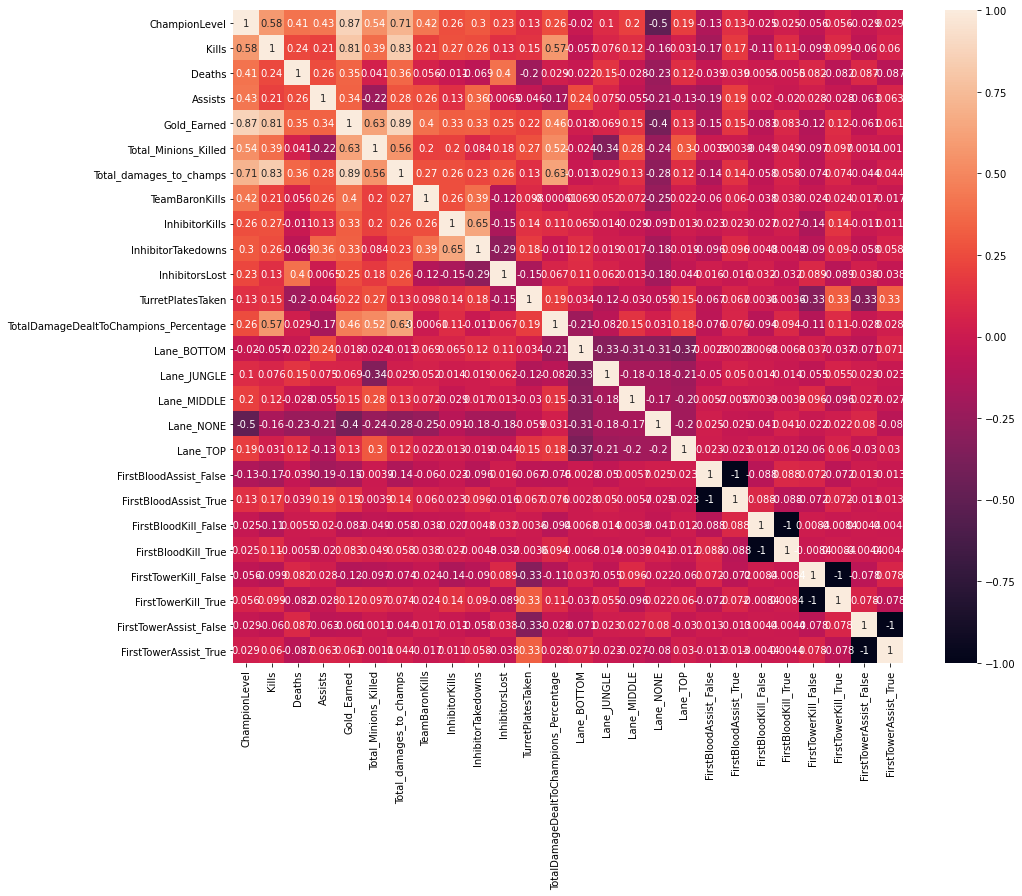

In [67]:
corrMatrix = X.corr()
sn.heatmap(corrMatrix, annot=True)
plt.rcParams["figure.figsize"] = (15,12)

## Logistic Regression

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [120]:
# split dataset into 70% training set and 30% testing set
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42)

In [97]:
model = LogisticRegression(solver = 'lbfgs').fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [98]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(X_test, y_test)}")

Training Data Score: 0.8075601374570447
Testing Data Score: 0.852


In [99]:
y_pred = model.predict(X_test)

In [100]:
from sklearn.metrics import confusion_matrix, classification_report

In [101]:
confusion_matrix(y_test, y_pred)

array([[ 97,  24],
       [ 13, 116]])

In [102]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       121
           1       0.83      0.90      0.86       129

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250



In [103]:
lane = df.groupby(['Win/Lose','Lane'])['Win/Lose'].count().unstack().fillna(0)

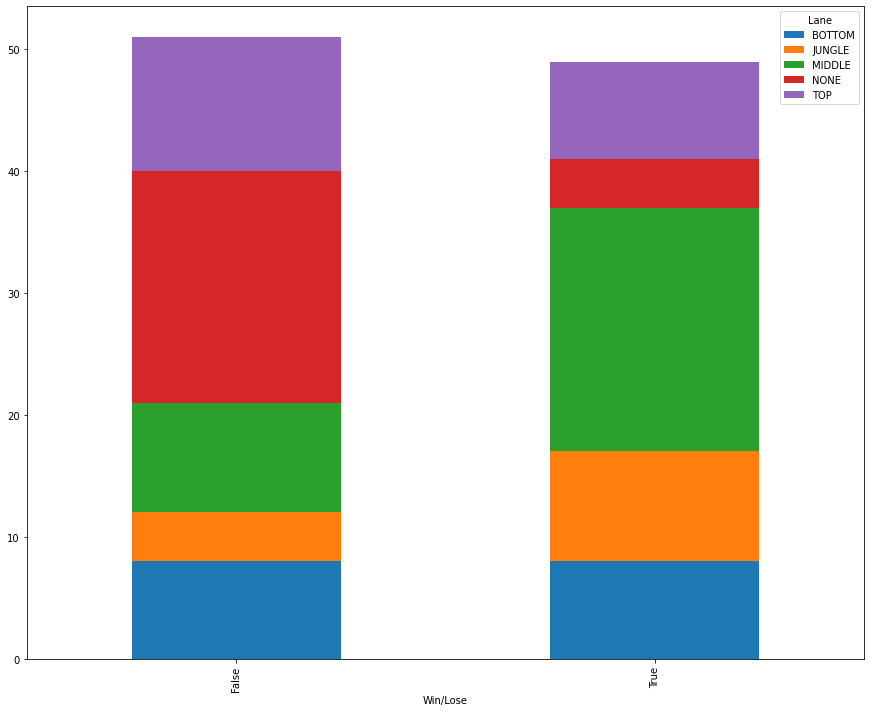

In [104]:
lane.plot(kind='bar', stacked=True)
plt.savefig("images/bar.png",bbox_inches = "tight")

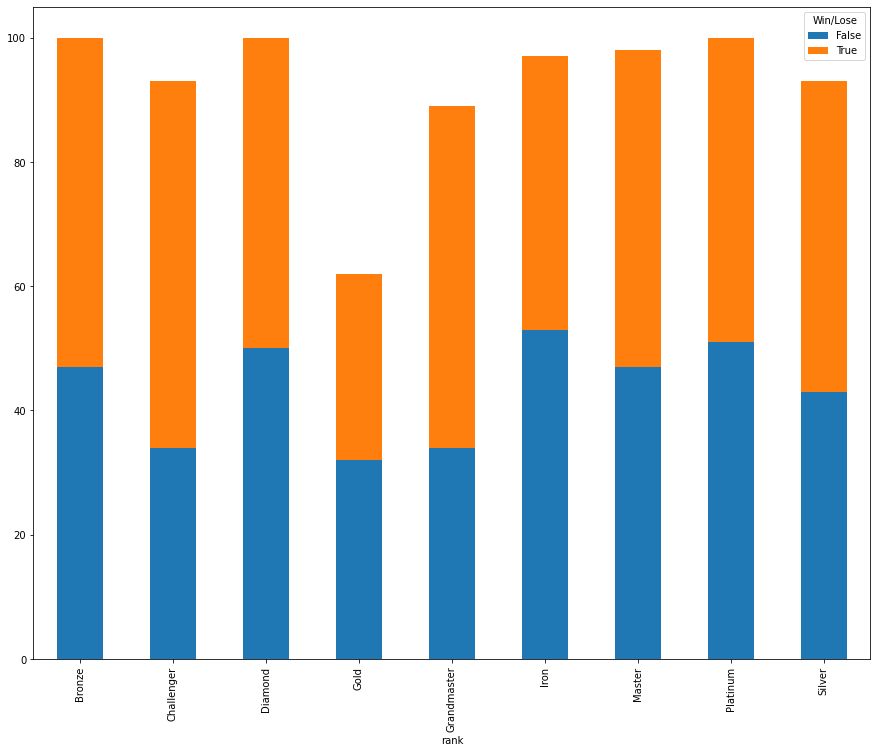

In [110]:
champion = df_final.groupby(['rank','Win/Lose'])['Win/Lose'].count().unstack().fillna(0)
champion.plot(kind='bar', stacked=True)
plt.savefig("images/champion_bar.png",bbox_inches = "tight")

## Side by Side boxplot to find relation between individual numeric variables and win/lose

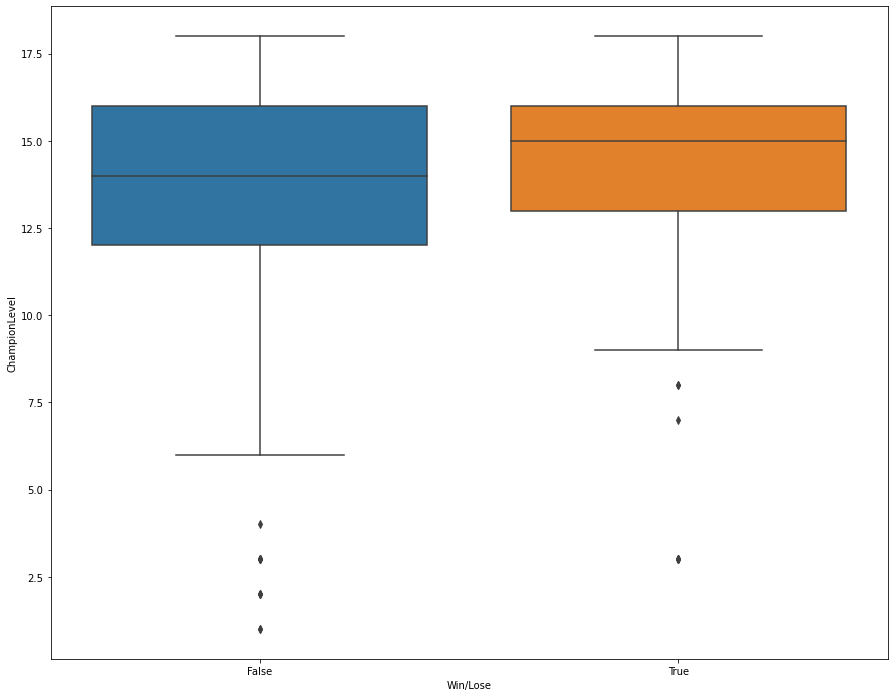

In [112]:
sn.boxplot(x='Win/Lose', y='ChampionLevel', data=df_final)
plt.savefig("images/ChampionLevel vs. Win_Lose.png",bbox_inches = "tight")

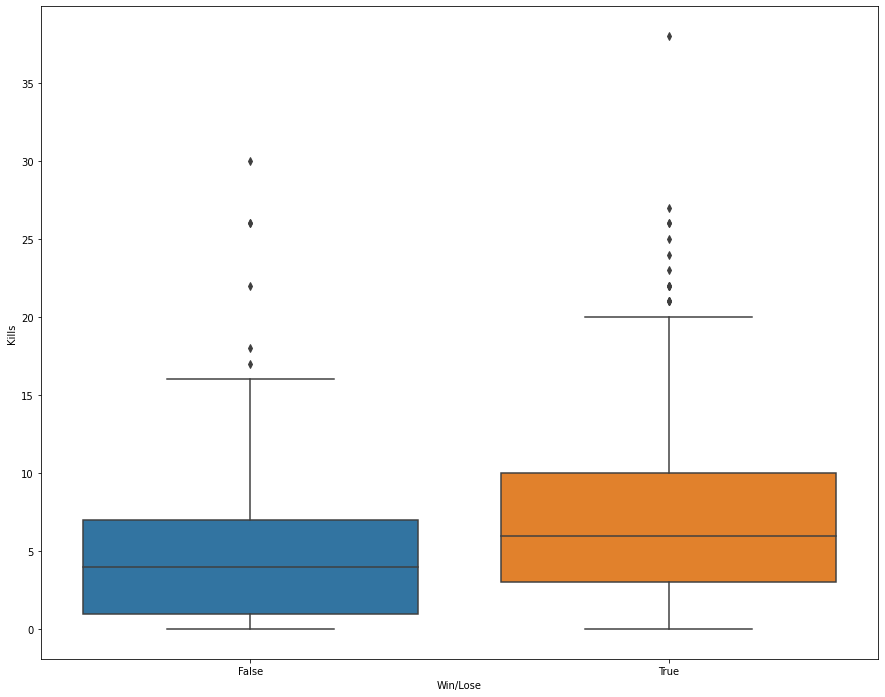

In [113]:
sn.boxplot(x='Win/Lose', y='Kills', data=df_final)
plt.savefig("images/Kills vs. Win_Lose.png",bbox_inches = "tight")

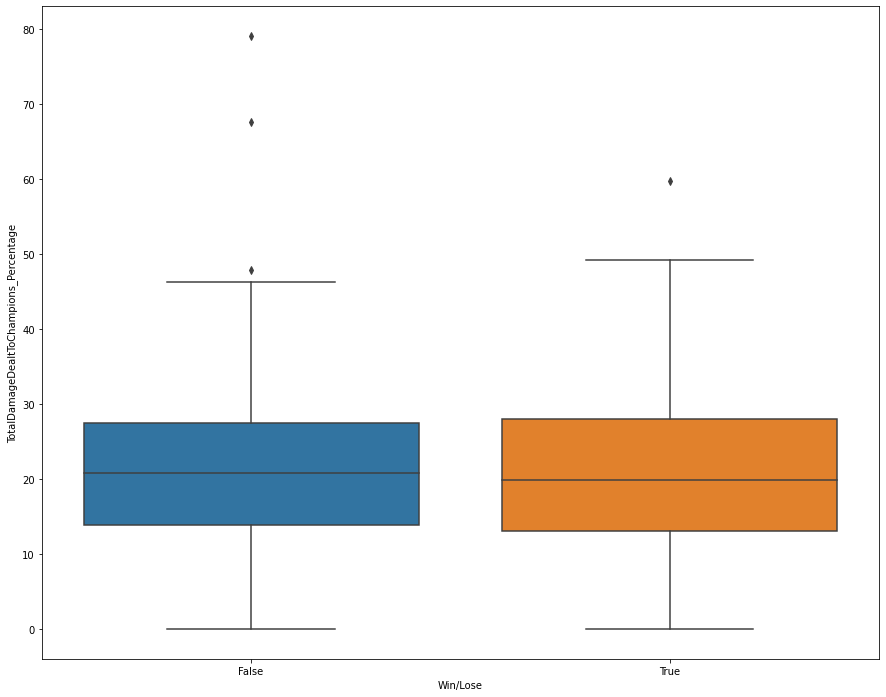

In [114]:
sn.boxplot(x='Win/Lose', y='TotalDamageDealtToChampions_Percentage', data=df_final)
plt.savefig("images/TotalDamageDealtToChampions_Percentage vs. Win_Lose.png",bbox_inches = "tight")

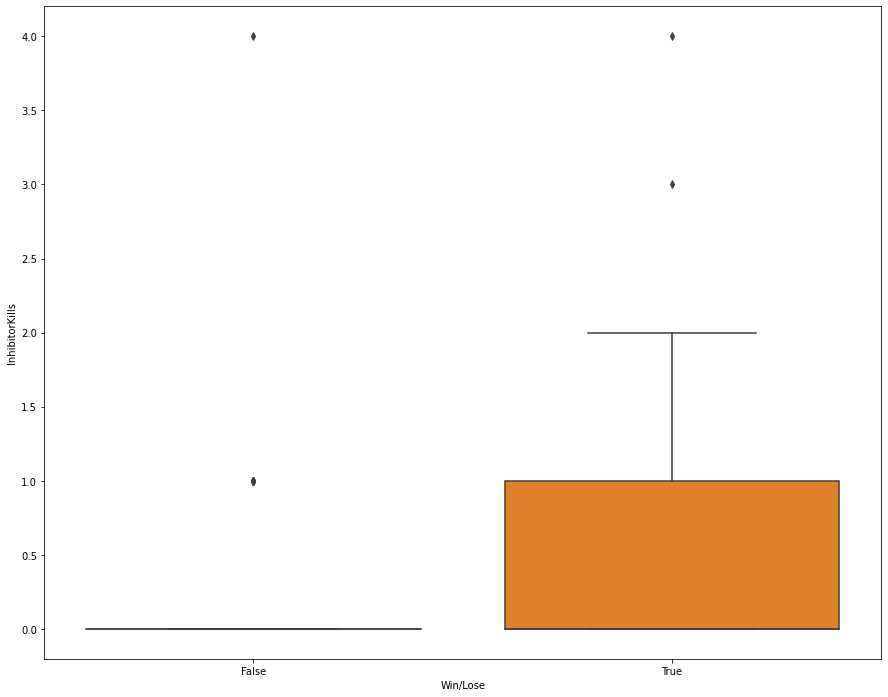

In [115]:
sn.boxplot(x='Win/Lose', y='InhibitorKills', data=df_final)
plt.savefig("images/InhibitorKills vs. Win_Lose.png",bbox_inches = "tight")

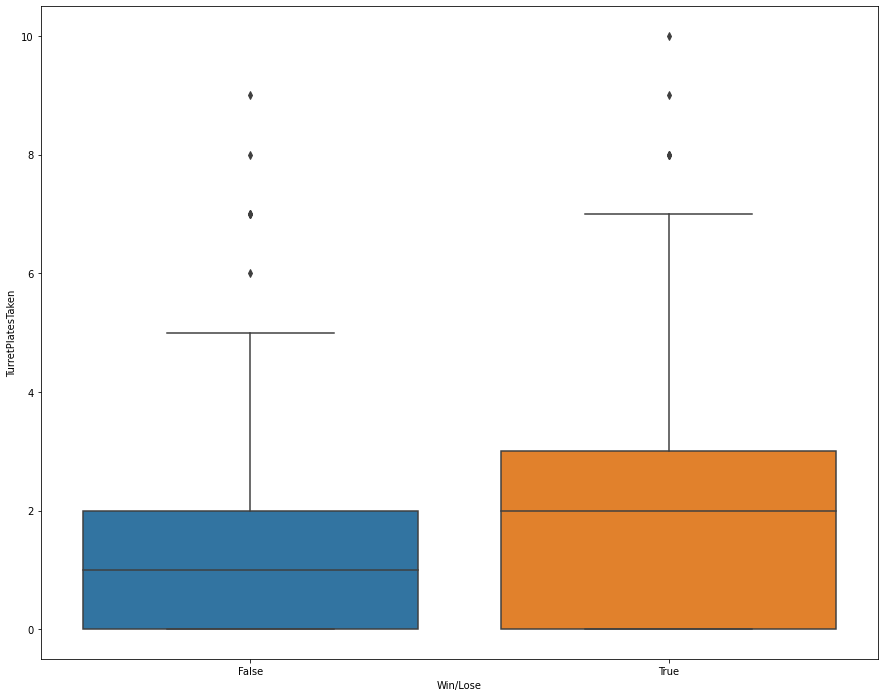

In [117]:
sn.boxplot(x='Win/Lose', y='TurretPlatesTaken', data=df_final)
plt.savefig("images/TurretPlatesTaken vs. Win_Lose.png",bbox_inches = "tight")

In [124]:
X_new = X.drop(['TotalDamageDealtToChampions_Percentage'], axis = 1)

In [125]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(
        X_new, y, test_size=0.3, random_state=42)

In [126]:
model_new = LogisticRegression(solver = 'lbfgs').fit(X_train_new,y_train_new)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [129]:
print(f"Training Data Score: {model_new.score(X_train_new, y_train_new)}")
print(f"Testing Data Score: {model_new.score(X_test_new, y_test_new)}")

Training Data Score: 0.872852233676976
Testing Data Score: 0.876


In [131]:
y_pred_new = model_new.predict(X_test_new)

In [158]:
pd.DataFrame(confusion_matrix(y_test, y_pred))

,0,1
0,97,24
1,13,116


In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       121
           1       0.83      0.90      0.86       129

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.85      0.85      0.85       250

